Title: Analyzing Temperature and Snowfall Change in the White Mountains
Author: Nick Querrazzi
3/28/2023
License: MIT -- https://opensource.org/licenses/MIT

Introduction:
    With climate change's impacts growing more prevalent each year, we must learn to use historical changes in our environment to prepare us for what the future may look like. This script analyzes any changes in both the temperature and the snowfall on Mt. Washington in the White Mountains of New Hampshire. The script will also look for any correlation between possible rising temperatures and a change in snowfall. The White Mountains are a popular winter destination for winter sport enthusiasts. If winters are becoming warmer and getting less snow, will it bring less tourists and therefore less money into the area? We must understand the trends in temperature and snowfall in order to protect our winters, if necessary. Not only does protecting our winters protect the economy and community in the White Mountains, but it also preserves the natural environment.

Hypothesis:
    It is hypothesized that there is an increasing trend in temperature and that it is leading to a decrease in snowfall in the White Mountains of New Hampshire throughout the winter (Dec-Mar).

Study Site:
    The data being analyzed was recorded on Mt. Washington in New Hampshire. The measurements took place at an elevation of 6272' and started in 1948 until 2023. The elevation is a few thousand feet higher in elevation than most the surrounding ski mountains, although this data provided the most thorough and longest dataset. While there may be differences in amount of snowfall and temperature, the trends this analysis provides will be applicable to the surrounding White Mountains. 

Data Set:
    The dataset obtained through NOAA (gauge: USW00014755) form Mt.Washington provides daily snowfall, minimum temperature, and maximum temperature each day from 1948 until 2023.
    Link to data: https://www.ncei.noaa.gov/access/search/data-search/normals-hourly?bbox=44.370,-71.403,44.170,-71.203

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy import stats

In [2]:
#%% Specify Parameters

fig_title1 = 'Mt. Washington, NH Snow Fall'
fig_title2 = 'Mt. Washington, NH Average Temperature'

#Name of input file with extension
infile_names = ['mt washington.csv']
#Data is in US Customary Units

#Create start and end dates
start_date = '1948-01-01'
end_date = '2022-12-31'

In [3]:
#%% Load Data

#Set the working directory
os.chdir('C:\\Users\\nquer\\OneDrive\\Desktop\\ESCI Final Project')

#Load data and set index
data = pd.read_csv(infile_names[0], comment='#',
                   parse_dates=['DATE'], index_col=['DATE'])

#Drop unnecessary columns
columns=['SNOW','TMAX','TMIN']
data = data[columns]

#Cutting data to start and end dates
data=data[start_date:end_date]

#Drop NaN values from the dataset before analysis
data = data.dropna()

In [4]:
#%% Data Analysis

#Creating an average temperature column using min and max temperatures from each day
data['TAVG']=(data.TMIN+data.TMAX)/2

print(data)

            SNOW  TMAX  TMIN  TAVG
DATE                              
1948-01-01   0.0  18.0   6.0  12.0
1948-01-02   3.7  16.0   4.0  10.0
1948-01-03   0.7  15.0   6.0  10.5
1948-01-04   0.0  20.0  12.0  16.0
1948-01-05   0.0  22.0  11.0  16.5
...          ...   ...   ...   ...
2022-11-27   0.0  36.0  28.0  32.0
2022-11-28   2.8  33.0  10.0  21.5
2022-11-29   0.0  26.0  16.0  21.0
2022-11-30   1.6  34.0  15.0  24.5
2022-12-31   0.0  39.0  32.0  35.5

[27348 rows x 4 columns]


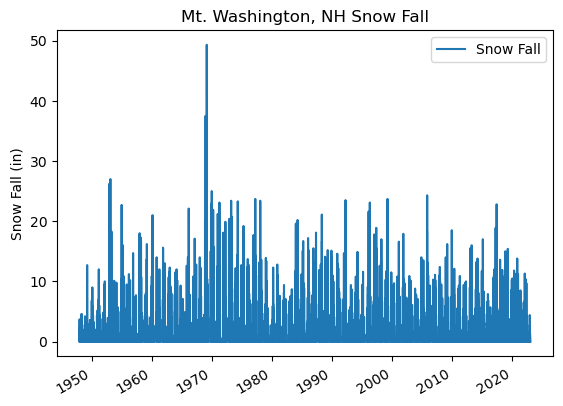

In [5]:
#%% Plot snow fall data

# Create plot to display snowfall data
fig, ax = plt.subplots()

# Plot snowfall data
ax.plot(data.SNOW, label='Snow Fall')  # x = dataframe index (date), y = snowfall in inches
                                     
# Add y-axis label    
ax.set_ylabel('Snow Fall (in)')   

# Add plot title
ax.set_title(fig_title1)

# Make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate()  

#Add a legend to the plot
plt.legend()

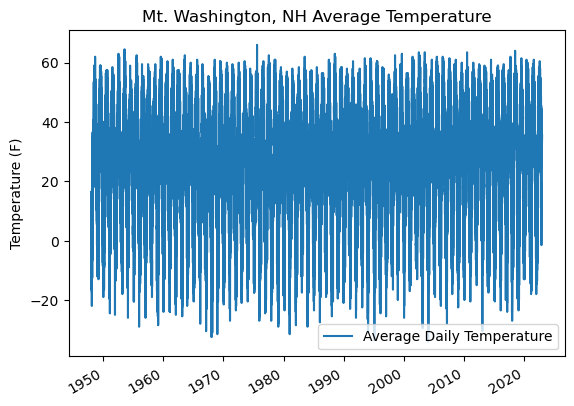

In [6]:
#%% Plot temperature data
# Create plot to display temperature data
fig, ax2 = plt.subplots()

# Plot average daily temperature data
ax2.plot(data.TAVG, label='Average Daily Temperature') 

# Add y-axis label    
ax2.set_ylabel('Temperature (F)')   

# Add plot title
ax2.set_title(fig_title2)

# Optional command to make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate()

#Add a legend to the plot
ax2.legend()

# Show the plot
plt.show()

In [7]:
#%% Create dataframe consisiting of just winter season, dec1-mar31

#Trime data to first Dec1 and last Mar 30
startdate=data.loc[(data.index.month==12)].index[0]
enddate=data.loc[(data.index.month==3)].index[-1]
winterdata = data[startdate:enddate].copy()

#Numbering each winter
#winterdata['winteryear'] = np.where(data.index.month>=11,data.index.year+1,data.index.year)
winterdata['month']=winterdata.index.month
winterdata['winteryear']=winterdata.index.year
winterdata.loc[winterdata['month']<=3,'winteryear']=winterdata.loc[winterdata['month']<=3,'winteryear'] -1

#Replace data with Nan outside winter months (dec,jan,feb,mar)
winterdata.loc[~((winterdata.index.month >= 12) | (winterdata.index.month <= 3))] = pd.NA

print(winterdata)

            SNOW  TMAX  TMIN  TAVG  month  winteryear
DATE                                                 
1948-12-01   3.2  18.0  12.0  15.0   12.0      1948.0
1948-12-02   0.0  20.0   7.0  13.5   12.0      1948.0
1948-12-03   0.0  28.0  16.0  22.0   12.0      1948.0
1948-12-04   0.0  39.0  25.0  32.0   12.0      1948.0
1948-12-05   0.0  41.0  29.0  35.0   12.0      1948.0
...          ...   ...   ...   ...    ...         ...
2022-03-27   5.0  19.0  -2.0   8.5    3.0      2021.0
2022-03-28   0.2  -2.0 -13.0  -7.5    3.0      2021.0
2022-03-29   0.8   1.0 -12.0  -5.5    3.0      2021.0
2022-03-30   0.3  30.0  -3.0  13.5    3.0      2021.0
2022-03-31   0.1  44.0  23.0  33.5    3.0      2021.0

[26784 rows x 6 columns]


In [8]:
#%% Winter Year Calculations

#Create new dataframe with yearly values for snowfall sum and average temperature
data_annual = winterdata[['SNOW']].groupby(winterdata.winteryear).sum()
data_annual['tavg'] = winterdata['TAVG'].groupby(winterdata.winteryear).mean()

#Rename columns in data_annual
data_annual.rename(columns = {"SNOW":"snowfall (in)",'tavg':'Temp (F)'},inplace=True)

print(data_annual)

            snowfall (in)   Temp (F)
winteryear                          
1948.0               83.0  11.851240
1949.0               95.8   9.012397
1950.0               91.9  12.132231
1951.0              128.0   9.516393
1952.0              182.5  11.272727
...                   ...        ...
2017.0              230.6   9.033058
2018.0              172.1   7.363636
2019.0              167.5  12.512295
2020.0              126.6  11.590909
2021.0              148.0   9.805785

[74 rows x 2 columns]


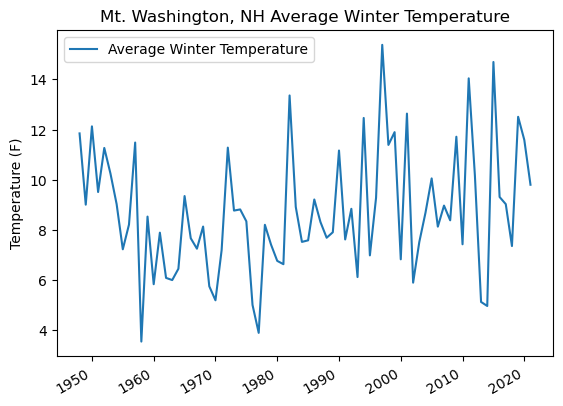

In [9]:
#%% Plotting average winter temperature

# Create plot to display temperature data
fig, ax3 = plt.subplots()

# Plot average daily temperature data
ax3.plot(data_annual['Temp (F)'], label='Average Winter Temperature') 

# Add y-axis label    
ax3.set_ylabel('Temperature (F)')   

# Add plot title
ax3.set_title('Mt. Washington, NH Average Winter Temperature')

# Optional command to make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate()

#Add a legend to the plot
ax3.legend()

# Show the plot
plt.show()

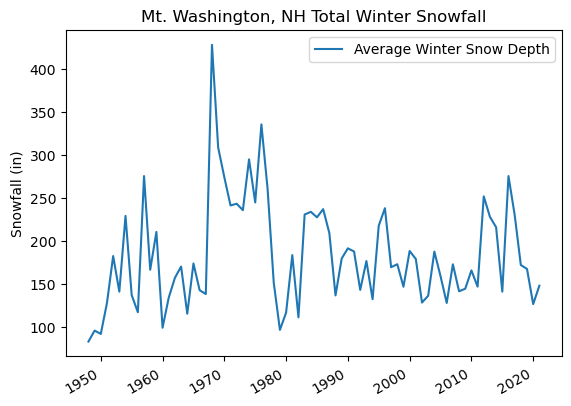

In [10]:
#%% Plotting average winter snowfall total

# Create plot to display temperature data
fig, ax4 = plt.subplots()

# Plot average daily temperature data
ax4.plot(data_annual['snowfall (in)'], label='Average Winter Snow Depth') 

# Add y-axis label    
ax4.set_ylabel('Snowfall (in)')   

# Add plot title
ax4.set_title('Mt. Washington, NH Total Winter Snowfall')

# Optional command to make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate()

#Add a legend to the plot
ax4.legend()

# Show the plot
plt.show()

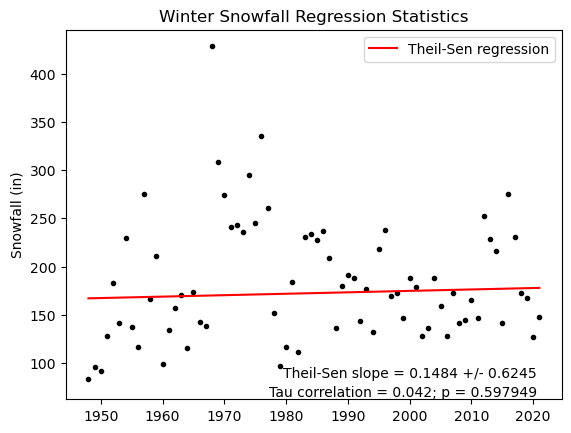

In [11]:
#%% Perform statistics to determine signifcant change in snowfall

#Perform nonlinear statistics to determine significance

def lsqplot(x, y, nonparam=False, xlabel=None, ylabel=None, xtoplot=None):
    sen_coeff = stats.theilslopes(y, x, 0.95)
    tau = stats.kendalltau(x, y)

    if xtoplot is None:
        xtoplot = x

    fig, ax = plt.subplots()
    ax.plot(xtoplot, y, 'k.')
    xx = ax.get_xlim()
    yy = ax.get_ylim()
    ax.set_ylim(bottom=yy[0]*.95)

    if nonparam is True:
        ax.plot(xtoplot, sen_coeff.intercept + sen_coeff.slope *
                x, 'r-', label='Theil-Sen regression')
        ax.annotate(f'Theil-Sen slope = {sen_coeff.slope:.4f} +/- {0.5*(sen_coeff.high_slope - sen_coeff.low_slope):.4f}',
                    xy=(xx[1]-0.05*(xx[1]-xx[0]), yy[0] + 0.05*(yy[1]-yy[0])),
                    horizontalalignment='right')
        ax.annotate(f'Tau correlation = {tau.correlation:.3f}; p = {tau.pvalue:.6f}',
                    xy=(xx[1]-0.05*(xx[1]-xx[0]), yy[0] - 0.001*(yy[1]-yy[0])),
                    horizontalalignment='right')

    ax.set_title('Winter Snowfall Regression Statistics')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper right')
    plt.show()
    
x = data_annual.index.values
y = data_annual['snowfall (in)']
lsq_coeff = stats.linregress(x, y)
slope = lsq_coeff.slope    
intercept = lsq_coeff.intercept

#Plot the data
lsqplot(x, y, nonparam=True, xtoplot = x, ylabel='Snowfall (in)')

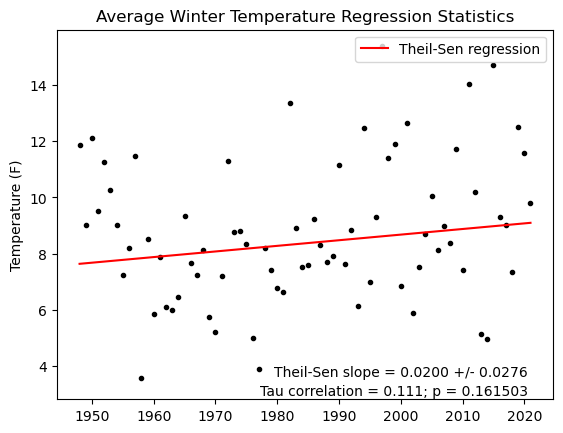

In [12]:
#%% Perform statistics to determine signifcant change in temperature

#Perform nonlinear statistics to determine significance

def lsqplot(x, y, nonparam=False, xlabel=None, ylabel=None, xtoplot=None):

    sen_coeff = stats.theilslopes(y, x, 0.95)
    tau = stats.kendalltau(x, y)

    if xtoplot is None:
        xtoplot = x

    fig, ax = plt.subplots()
    ax.plot(xtoplot, y, 'k.')
    xx = ax.get_xlim()
    yy = ax.get_ylim()
    ax.set_ylim(bottom=yy[0]*.95)

    if nonparam is True:
        ax.plot(xtoplot, sen_coeff.intercept + sen_coeff.slope *
                x, 'r-', label='Theil-Sen regression')
        ax.annotate(f'Theil-Sen slope = {sen_coeff.slope:.4f} +/- {0.5*(sen_coeff.high_slope - sen_coeff.low_slope):.4f}',
                    xy=(xx[1]-0.05*(xx[1]-xx[0]), yy[0] + 0.05*(yy[1]-yy[0])),
                    horizontalalignment='right')
        ax.annotate(f'Tau correlation = {tau.correlation:.3f}; p = {tau.pvalue:.6f}',
                    xy=(xx[1]-0.05*(xx[1]-xx[0]), yy[0] - 0.001*(yy[1]-yy[0])),
                    horizontalalignment='right')

    ax.set_title('Average Winter Temperature Regression Statistics')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper right')
    plt.show()
    
x = data_annual.index.values
y = data_annual['Temp (F)']
lsq_coeff = stats.linregress(x, y)
slope = lsq_coeff.slope    
intercept = lsq_coeff.intercept

#Plot the data
lsqplot(x, y, nonparam=True, xtoplot = x, ylabel='Temperature (F)')

Conclusion
    Discuss line of best fit slope (should be positive for temp and negative for snowfall if hypothesis is correct)
    Summarize any significance in average temperature change (p-value)
    Summarize any significance in total snowfall change (p-value)
    Discuss unexpected findings
    Possible error/ways to reduce error
    Implications of my findings
    Was my hypothesis correct?
    Conclusions that can be drawn
    